# Final Project: Stock Market Simulation and Reinforcement Learning

This notebook will guide you through the project assignment.

## Submission Guidelines:

* **Teamwork**: Submission is in pairs only.
* **Language**: Your answers should be in English.
* **Submission Format**:
  * You need to submit the completed IPython notebook (`.ipynb`) that runs on a Google Colab instance with all cell outputs printed. While you are allowed to run it on your local machine, ensure that your submission compiles and produces results when run on a clean runtime.
  * Additionally, submit a PDF version of the notebook along with the `.ipynb` file. Use the code provided at the end of this document to generate the required PDF.
* **Adherence to Guidelines**: Ensure that your submission adheres to the Gym specifications and that it can successfully run the provided models.
* **Submission Deadlines**: You will be given **1 month** to complete your project. Please manage your time effectively to ensure that you meet the deadline.

## Project Guidelines:

* **Goal**: The goal of your project is to implement your own stock market simulation environment, adhering to the OpenAI Gym specification, and then develop an RL agent to solve it. While you will be provided with general guidance and a code skeleton, you are encouraged to write your own code and explore alternative approaches. This project is not a typical homework assignment; it is an open-ended project. You are expected to conduct your own research, address challenges independently, and develop a deeper understanding of reinforcement learning and environment design.
  
* **Task Breakdown**: The project is divided into two main parts:
  1. **Part One**: Implement the basic environment with a simple action space of 3 actions.
  2. **Part Two**: Expand the environment to include a pool of money and additional complexities.
  
  It is recommended to start with Part One, but you may proceed with Part Two directly and treat Part One as a subcase of Part Two. Regardless of your approach, the environment must adhere to Gym specifications and be capable of running the provided models.

* **Code Flexibility**: You have the flexibility to modify the provided code or write your own entirely. However, your final implementation must comply with the Gym specification and be able to run with the provided models. Aim to achieve a positive reward on your initial implementation (without the pool of money) to demonstrate basic functionality.

* **Research and Problem Solving**: Since this is a project and not a guided homework assignment, independent research and problem-solving are key. While guidance and skeleton code are provided, you are expected to do your own research and try to solve the questions you may have on your own.


## Report Guidelines for Final Project Submission

Your project submission must include a written report, which should directly follow the content of the project. The report should be **approximately 6 pages** in length.

### Report Sections:

1. **Abstract**:
   - A concise, one-paragraph summary of the main scientific and engineering questions your work addresses and the primary conclusions you have drawn.

2. **Introduction**:
   - An expanded overview of the scientific background relevant to your project, including key prior work with proper citations.
   - Clearly state your research question(s), highlighting their novelty and significance.
   - Summarize your main findings.

3. **Data**:
   - Provide a brief description of the dataset(s) used, including key statistics and any preprocessing steps applied.

4. **Experiments and Results**:
   - This is the core section of your report. It should detail:
     - (i) What you did,
     - (ii) How you did it, and
     - (iii) The results of your experiments and analyses.
   - Divide this section into two subsections:
     1. **Basic Stock Environment**: Describe your approach and results for the initial environment setup.
     2. **Stock Environment Extension Task**: Focus on the more advanced, open-ended task. This subsection should form the bulk of the content.
   - Include figures and tables to support your results, ensuring all axes are clearly labeled, legends are provided when necessary, and each figure/table has an informative caption. Captions should briefly summarize the conclusions drawn.

5. **Discussion and Conclusions**:
   - Summarize your key results and discuss their theoretical and/or practical implications.
   - Address the limitations of your work and suggest possible directions for future research.

6. **Bibliography**:
   - Include all references cited in your report, formatted consistently.

### Additional Guidelines:

* **Structure and Clarity**:
   - Ensure that your report is well-structured and clearly written. While minor grammatical errors will not be penalized,unclear or partial exposition of the work will lead to deduction of points.

* **Appendix**:
   - You may include an appendix with additional figures, tables, or supplementary material. Ensure that all appendix content is referenced in the main text and includes appropriate captions. However, key results essential to understanding your work should be included in the main body of the report, not in the appendix.

* **Code Submission**:
   - While you are required to submit your code, your report should be self-contained. Readers should not need to refer to your raw code to understand your work.

* **Proofreading**:
   - Proofread your report carefully before submission to ensure clarity and coherence.

### Submission Format:

* Your report should be submitted as a separate typed PDF file.
* You may use LaTeX, Word, or any other software for document preparation, as per your preference.

**Academic Integrity Reminder:** All homework submissions will be rigorously checked for plagiarism and AI-generated content. Submissions found to contain such content will not be accepted. You are encouraged to use materials from lectures and tutorials to aid your understanding and complete your assignments. However, copying complete solutions from the internet or any other sources is strictly prohibited. It is essential to demonstrate your own understanding and effort in your work. Maintaining academic integrity is crucial for your learning and development.

# Part 1: Implement a Stock Market Simulation Environment

### Objective
Develop an OpenAI Gym environment that simulates a stock market for training reinforcement learning (RL) agents. The environment will simulate stock prices over time and allow the agent to take actions such as buying, selling, or holding a stock.

### Task Description
- Create an environment where the agent can observe past stock prices and make decisions based on this data.
- The environment should provide information about open, high, low, and close prices for a given number of past time steps (bars).
- The agent can take actions to buy a stock, sell a stock, or do nothing.
- Implement a reward system where the agent receives a reward based on the profit or loss from its trading decisions.


### Motivation

The finance domain is large and complex, and mastering it could take years, with continuous learning every day. In our example, we will merely scratch the surface with our reinforcement learning (RL) tools, formulating the problem as simply as possible using price as an observation. We aim to investigate whether our agent can learn the optimal time to buy a single share and then close the position to maximize profit. This example demonstrates the flexibility of the RL model and the initial steps required to apply RL to real-life scenarios.

To formulate RL problems, three key components are necessary: observation of the environment, possible actions, and a reward system. This flexibility allows us to pass potentially important information to the agent for efficient learning, such as prices, news, or significant upcoming statistics. However, this flexibility also necessitates experimenting with various data representations to find an effective agent, which is not always straightforward.

In our simplified trading agent implementation, the observation will include:
- N past bars with open, high, low, and close prices
- An indication of whether a share has been bought
- The current profit or loss from the held position

At each step, corresponding to a minute’s bar, the agent can take one of the following actions:
1. **Do nothing:** Skip the bar without any action.
2. **Buy a share:** If no share is currently held, buy one and incur a commission.
3. **Close the position:** If a share is held, sell it and incur a commission.

The agent’s reward can be structured in two ways:
1. **Incremental Reward:** Reward is distributed over multiple steps during the share's ownership, corresponding to each bar’s movement.
2. **Final Reward:** The agent receives a full reward only after closing the position, based on the total profit or loss.

Both reward structures theoretically lead to the same outcome but may differ in convergence speed. We will implement both to compare their effectiveness.

Additionally, we need to decide how to represent prices in our environment observation. To ensure our agent is independent of absolute price values and focuses on relative movements, we will convert each bar’s open, high, low, and close prices to percentages relative to the open price. This approach helps the system identify repeating patterns in price movements, a fundamental concept in technical analysis.

Despite potential drawbacks, such as losing information about key price levels, this representation simplifies the agents's task by focusing on relative price movements. This choice aims to help the system discover patterns regardless of the absolute price position. While an agent could theoretically learn to subtract the mean price from absolute values, starting with relative representation facilitates the learning process.

In summary, our goal is to build a flexible RL-based stock trading agent that can learn optimal trading strategies through experimentation with data representations, reward structures, and observation components. This example will set the stage for understanding the basics of applying RL to real world simulations.

## Step-by-Step Implementation

Follow the steps below to implement the stock market environment. Fill in the TODO sections with your code.


## Step 1: Import Necessary Libraries

To begin with, we need to import the necessary libraries and packages required for the stock market simulation environment. This includes installing additional libraries such as `ptan` and `tensorboardX`, checking for GPU availability, mounting Google Drive, and cloning a GitHub repository containing auxiliary functions.

At this point you don't need to do anything, just run the cells below.


In [ ]:
!pip uninstall gym

In [ ]:
!pip install ptan tensorboardX
!pip install gym[atari]

In [4]:
import gym
gym.__version__


'0.26.2'

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

In [6]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

Your runtime has 13.6 gigabytes of available RAM



In [7]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [8]:
from google.colab import drive
# drive.mount('/content/drive')

Importing the auxilary functions from CLAI github repo.

In [ ]:
!git clone https://github.com/aelashkin/CLAI-HW1.git /content/CLAI

# Verify the contents
!ls /content/CLAI

import sys
sys.path.append('/content/CLAI')

Unpacking the data:

In [10]:
!tar xvf /content/CLAI/data/ch08-small-quotes.tgz -C /content/CLAI/data/

YNDX_150101_151231.csv
YNDX_160101_161231.csv


## Step 2: Exploring the data contents

### Understanding the Data

The dataset we are going to use consists of Russian stock market prices for the period of 2015-2016. The data is stored in CSV files, each containing minute-by-minute (M1) bars. Each row in the CSV file represents one minute's worth of price data, including the open, high, low, and close prices for that minute. The volume of trades during that minute is also included. The structure of the data allows us to analyze and visualize the price movements within each minute, providing a detailed view of market activity.

In our example, we use the Yandex company stock prices for 2016, which is represented in the file `YNDX_160101_161231.csv`. This file contains approximately 130,000 lines of data, with each line representing a single minute's trading activity. The columns in the dataset are as follows:
- `<DATE>`: The date of the trading activity.
- `<TIME>`: The time of the trading activity.
- `<OPEN>`: The price at the beginning of the minute.
- `<HIGH>`: The highest price during the minute.
- `<LOW>`: The lowest price during the minute.
- `<CLOSE>`: The price at the end of the minute.
- `<VOL>`: The volume of trades during the minute.

To get a better understanding of the data, let's print out the first 50 lines:

In [163]:
# Import necessary libraries
import pandas as pd

# Define the path to the CSV file
file_path = 'CLAI/data/YNDX_160101_161231.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first 50 lines of the DataFrame
df.head(10)


,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,20160104,100100,1148.9,1148.9,1148.9,1148.9,0
1,20160104,100200,1148.9,1148.9,1148.9,1148.9,50
2,20160104,100300,1149.0,1149.0,1149.0,1149.0,33
3,20160104,100400,1149.0,1149.0,1149.0,1149.0,4
4,20160104,100500,1153.0,1153.0,1153.0,1153.0,0
5,20160104,100600,1156.9,1157.9,1153.0,1153.0,43
6,20160104,100700,1150.6,1150.6,1150.4,1150.4,5
7,20160104,100800,1150.2,1150.2,1150.2,1150.2,4
8,20160104,100900,1150.5,1150.5,1150.5,1150.5,2
9,20160104,101000,1150.0,1150.0,1150.0,1150.0,43


### Visualizing the Data with a Candlestick Chart

A candlestick chart is a widely used financial chart that depicts the price movements of a security, such as a stock, over a specific period. Each "candlestick" on the chart represents the price action for a single time interval, which, in this case, is one minute.

#### Components of a Candlestick:

1. **Body:** The thick part of the candlestick represents the range between the opening and closing prices during the interval. If the closing price is higher than the opening price, the body is typically colored green or left hollow, indicating a price increase. Conversely, if the closing price is lower than the opening price, the body is usually colored red or filled, indicating a price decrease.

2. **Wicks (Shadows):** The thin lines extending above and below the body are called wicks or shadows. The upper wick represents the highest price reached during the interval, while the lower wick represents the lowest price. These wicks show the range of price movement outside the opening and closing prices.

To create a candlestick chart using the first 50 minutes of the Yandex stock data for 2016, we will do the following:

In [12]:
import pandas as pd
import plotly.graph_objects as go

# Define the path to the CSV file
file_path = 'CLAI/data/YNDX_160101_161231.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Convert the <DATE> and <TIME> columns to a single datetime column
df['datetime'] = pd.to_datetime(df['<DATE>'].astype(str) + df['<TIME>'].astype(str), format='%Y%m%d%H%M%S')

# Select the first 50 rows for visualization
df = df.head(50)

# Create a candlestick chart
fig = go.Figure(data=[go.Candlestick(x=df['datetime'],
                                     open=df['<OPEN>'],
                                     high=df['<HIGH>'],
                                     low=df['<LOW>'],
                                     close=df['<CLOSE>'])])

# Update the layout of the chart
fig.update_layout(title='Candlestick Chart for Yandex Stock Prices (First 50 Minutes of 2016)',
                  xaxis_title='Time',
                  yaxis_title='Price',
                  xaxis_rangeslider_visible=False)

# Show the chart
fig.show()


#### What You See on the Chart:

The candlestick chart for Yandex stock prices over the first 50 minutes of 2016 shows the following:
- **X-axis:** Time intervals (each minute) during the selected period.
- **Y-axis:** Stock prices.

Each candlestick on the chart provides a snapshot of price activity for one minute:
- **Green Candles:** Indicate that the stock price closed higher than it opened during that minute.
- **Red Candles:** Indicate that the stock price closed lower than it opened.
- **Upper and Lower Wicks:** Show the highest and lowest prices reached during each minute, providing a full range of price fluctuations.


## Step 2: Define Constants and Enumerations

In this step, we will define the constants and enumerations needed for our environment. We will start by setting default values for the number of bars and commission percentage. These constants help to maintain consistency and make the environment's parameters easily adjustable.

Next, we encode all available actions as fields of an enumerator. We support a very simple set of actions with only three options:

1. **Skip (0):** Do nothing and move to the next time step without making any transactions. This action allows the agent to observe market behavior without committing to a position, which can be useful for identifying trends or waiting for a more favorable moment to act.

2. **Buy (1):** Purchase a single share if no share is currently held. If a share is already held, this action will have no effect. When buying a share, the agent incurs a commission, which is a small percentage of the current price. This action is crucial for the agent to take a position in the market and potentially profit from future price movements.

3. **Close (2):** Sell the currently held share, if any, and close the existing position. If no share is held, this action will have no effect. Similar to buying, closing a position also incurs a commission. This action allows the agent to realize profits or cut losses by exiting the market.


In [13]:
import enum

DEFAULT_BARS_COUNT = 10
DEFAULT_COMMISSION_PERC = 0.1

class Actions(enum.Enum):
    Skip = 0
    Buy = 1
    Close = 2

## Step 3: Implement the State Class

The `State` class is a critical component that manages the state of the environment. It is responsible for maintaining the current state of the environment and providing the necessary data to the agent. The constructor of the `State` class accepts several arguments to customize the environment's behavior and observation representation:

- **bars_count:** The number of past bars (time steps) to include in the observation. By default, this is set to 10 bars. This parameter controls how much historical data is provided to the agent at each step, helping it make informed decisions based on recent market trends.
  
- **commission_perc:** The commission percentage the agent has to pay when buying or selling a stock. By default, this is set to 0.1%. This parameter simulates the real-world cost of trading, which affects the agent's profitability and decision-making.

- **reset_on_close:** A boolean flag that determines whether the environment should reset when the agent closes a position (sells a share). By default, this is set to True, meaning the episode will end when a position is closed. If set to False, the episode will continue until the end of the available data series, typically one year of data.

- **reward_on_close:** A boolean flag that determines whether the reward is given only when a position is closed or distributed incrementally over each time step. This flexibility allows us to experiment with different reward structures and their impact on the agent's learning process.

- **volumes:** A boolean flag indicating whether volume data should be included in the observation. Including volume data can provide additional insight into market activity and liquidity.

The `State` class contains several key methods:

1. **`reset(self, prices, offset):`** This method initializes the state with the given prices and offset. It ensures that the environment starts with no position held and resets the necessary internal variables. The `prices` parameter is an instance of `data.Prices`, which holds the price data arrays, and `offset` is the starting point in the time series from which to begin the simulation.

2. **`shape(self):`** This property method returns the shape of the state representation. The shape varies depending on whether volume data is included. It accounts for the high, low, and close prices for each bar, as well as flags indicating the position status and relative profit.

3. **`encode(self):`** This method converts the current state into a numpy array, making it suitable for input to the neural network. It compiles the high, low, and close prices of the past bars, the position flag, and the relative profit into a single array.

4. **`_cur_close(self):`** This private method calculates the actual close price for the current bar, taking into account the relative close price and the open price. This calculation is essential for determining the profit or loss when closing a position.

5. **`step(self, action):`** This method performs a step in the environment based on the agent's action. It updates the state, handles position changes (buying or closing a position), calculates the reward, and checks if the episode is done. The reward is adjusted for commission costs, and the position status is updated accordingly.

By implementing these methods, the `State` class will provide a framework for managing the environment's state, processing agent actions, and encoding the state data for input into the agent's neural network.

In [14]:
class State:
    def __init__(self, bars_count, commission_perc, reset_on_close, reward_on_close=False, volumes=True):
        assert isinstance(bars_count, int)
        assert bars_count > 0
        assert isinstance(commission_perc, float)
        assert commission_perc >= 0.0
        assert isinstance(reset_on_close, bool)
        assert isinstance(reward_on_close, bool)
        self.bars_count = bars_count
        self.commission_perc = commission_perc
        self.reset_on_close = reset_on_close
        self.reward_on_close = reward_on_close
        self.volumes = volumes

    def reset(self, prices, offset):
        assert isinstance(prices, data.Prices)
        assert offset >= self.bars_count-1
        self.have_position = False
        self.open_price = 0.0
        self._prices = prices
        self._offset = offset


    @property
    def shape(self):
        # [h, l, c] * bars + position_flag + rel_profit (since open)
        if self.volumes:
            return (4 * self.bars_count + 1 + 1, )
        else:
            return (3*self.bars_count + 1 + 1, )

    def encode(self):
        """
        Convert the state to a numpy array
        """
        res = np.zeros(shape=self.shape, dtype=np.float32)

        if self.volumes:
            highs_ind = np.array([4*i for i in range(self.bars_count)])
        else:
            highs_ind = np.array([3*i for i in range(self.bars_count)])
        lows_ind = highs_ind + 1
        closes_ind = highs_ind + 2

        res[highs_ind] = self._prices.high[self.offset-self.bars_count+1:self.offset+1]
        res[lows_ind] = self._prices.low[self.offset-self.bars_count+1:self.offset+1]
        res[closes_ind] = self._prices.close[self.offset-self.bars_count+1:self.offset+1]
        last_ind = closes_ind[-1]
        if self.volumes:
            res[closes_ind + 1] = self._prices.volume[self.offset-self.bars_count+1:self.offset+1]
            last_ind +=1
        res[last_ind+1] = 1.0 if self.have_position else 0.0
        res[last_ind+2] = self.rel_profit
        return res

    def _cur_close(self):
        """
        Calculate real close price for the current bar
        """
        open = self._prices.open[self._offset]
        rel_close = self._prices.close[self._offset]
        return open * (1.0 + rel_close)

    def step(self, action):
        """
        Perform one step in our price, adjust offset, check for the end of prices
        and handle position change
        :param action:
        :return: reward, done
        """
        assert isinstance(action, Actions)
        reward = 0.0
        done = False
        close = self._cur_close()
        if action == Actions.Buy and not self.have_position:
            self.have_position = True
            self.open_price = close
            reward -= self.commission_perc
        elif action == Actions.Close and self.have_position:
            reward -= self.commission_perc
            done |= self.reset_on_close
            if self.reward_on_close:
                reward += 100.0 * (close - self.open_price) / self.open_price
            self.have_position = False
            self.open_price = 0.0
        elif action==Actions.Skip and self.have_position:
            reward -= 1.1*self.commission_perc



        self._offset += 1
        prev_close = close
        close = self._cur_close()
        done |= self._offset >= self._prices.close.shape[0]-1

        if self.have_position and not self.reward_on_close:
            reward += 100.0 * (close - prev_close) / prev_close

        return reward, done


## Step 4: Implement the State1D Class

The `State1D` class is a subclass of the `State` class, providing a specialized representation of the state suitable for 1D convolutional neural networks. While it inherits the core functionality from the `State` class, it overrides the shape and encoding methods to fit the requirements of 1D convolution operations.

### Class: `State1D`

#### Property: `shape`

The `shape` property in the `State1D` class returns a different shape compared to the base `State` class. This shape is designed to be compatible with 1D convolutional neural networks, encoding the prices as a 2D matrix.

- **Returns:**
  - `tuple`: The shape of the state representation. If volumes are included, the shape is `(6, bars_count)`, otherwise, it is `(5, bars_count)`.

#### Method: `encode`

The `encode` method in the `State1D` class converts the current state into a 2D NumPy array, which is suitable for 1D convolutional operations. This representation organizes the price data into distinct rows for high, low, and close prices, with optional volume data and additional information about the position status and profit.

- **Returns:**
  - `numpy.ndarray`: The encoded state as a 2D array.

- **Behavior:**
  - Initializes a zero matrix with the shape determined by the `shape` property.
  - Fills the matrix with high, low, and close prices from the specified number of past bars.
  - Includes volume data if `volumes` is set to True.
  - Adds flags for the position status (whether a share is held) and the relative profit if a position is held.

The encoding process organizes the data into a matrix where each row corresponds to a different type of information (e.g., high prices, low prices), and each column represents a different bar (time step). This structure is analogous to different color channels in image data, making it well-suited for 1D convolutional layers.


In [15]:
class State1D(State):
    """
    State with shape suitable for 1D convolution
    """
    @property
    def shape(self):
        if self.volumes:
            return (6, self.bars_count)
        else:
            return (5, self.bars_count)

    def encode(self):
        res = np.zeros(shape=self.shape, dtype=np.float32)
        ofs = self.bars_count-1
        res[0] = self._prices.high[self._offset-ofs:self._offset+1]
        res[1] = self._prices.low[self._offset-ofs:self._offset+1]
        res[2] = self._prices.close[self._offset-ofs:self._offset+1]
        if self.volumes:
            res[3] = self._prices.volume[self._offset-ofs:self._offset+1]
            dst = 4
        else:
            dst = 3
        if self.have_position:
            res[dst] = 1.0
            res[dst+1] = (self._cur_close() - self.open_price) / self.open_price
        return res

## Step 5: Implement the StocksEnv Class


The `StocksEnv` class is a custom OpenAI Gym environment designed to simulate a stock market for training reinforcement learning (RL) agents. It allows agents to interact with a simulated market by observing stock prices, taking actions, and receiving rewards.

### Class: `StocksEnv`

#### Constructor: `__init__`

The constructor sets up the environment with configurable parameters, such as stock prices, the number of past bars to include in observations, and whether to use a 1D convolutional neural network-compatible state representation. It defines the action and observation spaces and sets a random seed for reproducibility.

#### Method: `reset`

The `reset` method initializes the environment to a starting state. It selects an instrument from the available price data, sets the starting point in the time series, and resets the state. This provides the agent with an initial observation to begin the episode.

#### Method: `step`

The `step` method advances the environment by one time step based on the action taken by the agent. It updates the state, calculates the reward, and checks if the episode has ended. It returns the new observation, the reward, a flag indicating if the episode is over, and additional info about the current state.

#### Method: `render`

The `render` method is a placeholder for visualizing the environment. Currently, it does not perform any rendering but could be extended to display stock prices and agent actions.

#### Method: `close`

The `close` method is a placeholder for closing the environment. It currently does not perform any actions but could be used to clean up resources.

#### Method: `seed`

The `seed` method sets the random seed for the environment to ensure reproducibility. It returns the seed values used.

#### Class Method: `from_dir`

The `from_dir` class method creates an instance of `StocksEnv` using price data files from a specified directory. This simplifies setting up the environment with a new dataset.

In [16]:
import gym
class StocksEnv(gym.Env):
    metadata = {'render.modes': ['human']}

    def __init__(self, prices, bars_count=DEFAULT_BARS_COUNT,
                 commission=DEFAULT_COMMISSION_PERC, reset_on_close=True, state_1d=False,
                 random_ofs_on_reset=True, reward_on_close=False, volumes=False):
        assert isinstance(prices, dict)
        self._prices = prices
        if state_1d:
            self._state = State1D(bars_count, commission, reset_on_close, reward_on_close=reward_on_close,
                                  volumes=volumes)
        else:
            self._state = State(bars_count, commission, reset_on_close, reward_on_close=reward_on_close,
                                volumes=volumes)

        self.action_space = gym.spaces.Discrete(n=len(Actions))

        low_mat = np.zeros(shape=self._state.shape, dtype=np.float32)
        low_mat[-1] = -np.inf
        high_mat = np.zeros(shape=self._state.shape, dtype=np.float32)
        high_mat.fill(np.inf)
        high_mat[-2] = 1.0

        self.observation_space = gym.spaces.Box(low=low_mat, high=high_mat, shape=self._state.shape, dtype=np.float32)

        self.random_ofs_on_reset = random_ofs_on_reset
        self.seed()

    def reset(self):

        self._instrument = self.np_random.choice(list(self._prices.keys()))
        prices = self._prices[self._instrument]
        bars = self._state.bars_count
        if self.random_ofs_on_reset:
            offset = self.np_random.choice(prices.high.shape[0]-bars*10) + bars
        else:
            offset = bars
        self._state.reset(prices, offset)
        encoded_state = self._state.encode()
        return (encoded_state,None)

    def step(self, action_idx):
        action = Actions(action_idx)
        reward, done = self._state.step(action)
        obs = self._state.encode()
        info = {"instrument": self._instrument, "offset": self._state._offset}
        terminated = done
        truncated = False


        if hasattr(self, 'time_limit') and self._state._offset >= self.time_limit:
            truncated = True
            terminated = False
        return obs, reward, terminated, truncated, info

    def render(self, mode='human', close=False):
        pass

    def close(self):
        pass

    def seed(self, seed=None):
        if seed is not None:
            np.random.seed(seed)
            self.np_random = np.random.RandomState(seed)
        else:

            self.np_random = np.random.RandomState()

        seed1 = seed if seed is not None else self.np_random.randint(0, 2**31 - 1)
        seed2 = self.np_random.randint(0, 2**31 - 1)

        return [seed1, seed2]
    @classmethod
    def from_dir(cls, data_dir, **kwargs):
        prices = {file: data.load_relative(file) for file in data.price_files(data_dir)}
        return StocksEnv(prices, **kwargs)

## Step 6: Running the environment

### Defining the Convolutional Model: DQNConv1D

The `DQNConv1D` class defines a convolutional neural network model tailored for 1D time-series data, such as stock market prices. This model uses 1D convolutional layers to extract sequential features from the input data. The architecture comprises two main parts: the feature extraction layers and the fully connected heads. The feature extraction is performed through two 1D convolutional layers, each followed by ReLU activation to introduce non-linearity. These layers capture temporal patterns in the stock prices, which are essential for predicting future movements.

After extracting features, the model splits into two fully connected (FC) heads: the value head and the advantage head. The value head outputs the estimated value of the current state, while the advantage head calculates the advantages for each possible action. This separation allows the model to differentiate between the overall quality of a state and the specific benefits of taking certain actions within that state. The final output combines these two components, helping the agent to make informed trading decisions.


In [17]:
import math
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F


class DQNConv1D(nn.Module):
    def __init__(self, shape, actions_n):
        super(DQNConv1D, self).__init__()

        self.conv = nn.Sequential(
            nn.Conv1d(shape[0], 128, 5),
            nn.ReLU(),
            nn.Conv1d(128, 128, 5),
            nn.ReLU(),
        )

        out_size = self._get_conv_out(shape)

        self.fc_val = nn.Sequential(
            nn.Linear(out_size, 512),
            nn.ReLU(),
            nn.Linear(512, 1)
        )

        self.fc_adv = nn.Sequential(
            nn.Linear(out_size, 512),
            nn.ReLU(),
            nn.Linear(512, actions_n)
        )

    def _get_conv_out(self, shape):
        o = self.conv(torch.zeros(1, *shape))
        return int(np.prod(o.size()))

    def forward(self, x):
        conv_out = self.conv(x).view(x.size()[0], -1)
        val = self.fc_val(conv_out)
        adv = self.fc_adv(conv_out)
        return val + adv - adv.mean(dim=1, keepdim=True)

Testing the environment involves several key steps. First, we load and preprocess the stock price data to ensure it fits the input requirements of both the model and the `StocksEnv` environment. Next, we initialize the environment with the preprocessed data, setting up the configuration parameters like the number of past bars to include in each observation and whether to use volume data.

Once the environment is set up, we create an instance of the `DQNConv1D` model, specifying the input shape and the number of actions. The model is then trained by allowing it to interact with the environment: taking actions, receiving rewards, and updating its parameters based on the outcomes. An optimizer adjusts the model's weights to improve performance over time. Periodic evaluation during training ensures that the model is learning effectively.


### Training the Convolutional Model

#### Epsilon-Greedy Exploration

We employ an epsilon-greedy strategy for action selection to balance exploration and exploitation. Initially, the epsilon value is set to 1.0, encouraging the agent to explore a wide range of actions. Over the first one million steps, epsilon linearly decays to 0.1, gradually shifting the agent's focus towards exploiting the knowledge it has gained to make more informed decisions. This approach ensures that the agent explores sufficiently early on to discover various strategies and refines its decision-making process over time.

#### Experience Replay Buffer

A simple experience replay buffer of size 100,000 stores the agent's transitions (state, action, reward, next state). The buffer is initially populated with 10,000 transitions before training begins to ensure a diverse set of experiences for learning. During training, batches of experiences are randomly sampled from this buffer to break the temporal correlations and provide more stable and robust learning updates to the model. This technique helps in reducing overfitting and improves the generalization of the learned policies.

#### Q-Value Dynamics Monitoring

Every 1,000 steps, the mean Q-value for a fixed set of states is calculated. This periodic evaluation helps monitor the dynamics of the Q-values throughout the training process, providing insights into how the model's predictions are evolving. Tracking these values is crucial for understanding the learning progression and making necessary adjustments to the training parameters if required.

#### Periodic Validation

To ensure that the model generalizes well and does not overfit the training data, we perform validation every 100,000 steps. During validation, the agent plays 100 episodes using both the training data and previously unseen stock price data. Various characteristics of the orders are recorded in TensorBoard, including mean profit, the average number of bars held, and the share held count. These metrics help identify overfitting by comparing performance on training and validation datasets. If the model performs significantly better on the training data compared to the validation data, it indicates overfitting, prompting adjustments in the training regimen.

Now we will define the following parameters for the training:

#### Training Parameters

- **BATCH_SIZE = 32:** This variable sets the number of training samples used in one iteration of the model training process. A batch size of 32 means that the model will update its weights after processing 32 samples from the replay buffer.

- **BARS_COUNT = 50:** This specifies the number of past time steps (bars) that the model uses as input for making predictions. In this context, each bar represents one minute of trading data.

- **TARGET_NET_SYNC = 1000:** This defines the frequency (in steps) at which the target network's weights are updated to match the main network's weights. The target network is used to stabilize training by providing consistent Q-value estimates.

- **DEFAULT_STOCKS = "CLAI/data/YNDX_160101_161231.csv":** This is the default file path for the stock data used for training. It contains historical price data for Yandex stock for the year 2016.

- **DEFAULT_VAL_STOCKS = "CLAI/data/YNDX_150101_151231.csv":** This is the default file path for the stock data used for validation. It contains historical price data for Yandex stock for the year 2015.

#### Hyperparameters

- **GAMMA = 0.99:** The discount factor used in the Q-learning algorithm. It determines the importance of future rewards. A value of 0.99 means that future rewards are considered almost as important as immediate rewards.

- **REPLAY_SIZE = 100000:** The maximum size of the experience replay buffer. This buffer stores past experiences (state, action, reward, next state) to be used for training the model.

- **REPLAY_INITIAL = 10000:** The number of experiences to collect before starting the training process. This ensures that the replay buffer has enough data to sample from when training begins.

- **REWARD_STEPS = 2:** The number of steps to consider when computing the reward for an action. This allows the agent to account for delayed rewards, which can be crucial in a trading environment.

- **LEARNING_RATE = 0.0001:** The rate at which the model updates its weights during training. A smaller learning rate means that the model makes smaller adjustments to its weights, which can lead to more stable training.

#### Evaluation and Exploration

- **STATES_TO_EVALUATE = 1000:** The number of states used to evaluate the performance of the model during training. This helps monitor the model's progress and stability.

- **EVAL_EVERY_STEP = 1000:** The frequency (in steps) at which the model's performance is evaluated during training. Regular evaluations help track improvements and detect potential issues early.

- **EPSILON_START = 1.0:** The initial value of epsilon in the epsilon-greedy exploration strategy. Epsilon determines the probability of choosing a random action versus the action suggested by the model. An epsilon of 1.0 means the agent will explore by choosing random actions initially.

- **EPSILON_STOP = 0.1:** The final value of epsilon after it has decayed over time. An epsilon of 0.1 means the agent will still explore occasionally, but mostly follow the model's suggestions.

- **EPSILON_STEPS = 1000000:** The number of steps over which epsilon decays from its initial value to its final value. This gradual decay balances exploration and exploitation as training progresses.

#### Checkpoints and Validation

- **CHECKPOINT_EVERY_STEP = 100000:** The frequency (in steps) at which the model's weights are saved to a checkpoint file. Checkpoints allow you to resume training from a specific point or analyze the model's performance at different stages of training.

- **VALIDATION_EVERY_STEP = 12000:** The frequency (in steps) at which the model is validated using a separate validation dataset. Regular validation helps ensure that the model generalizes well to unseen data and prevents overfitting.

In [18]:
#You can adjust the numbers depending on how long you want your training to be

BATCH_SIZE = 32
BARS_COUNT = 50
TARGET_NET_SYNC = 1000
DEFAULT_STOCKS = "CLAI/data/YNDX_160101_161231.csv"
DEFAULT_VAL_STOCKS = "CLAI/data/YNDX_150101_151231.csv"

GAMMA = 0.99

REPLAY_SIZE = 100000
REPLAY_INITIAL = 10000

REWARD_STEPS = 2

LEARNING_RATE = 0.0001

STATES_TO_EVALUATE = 1000
EVAL_EVERY_STEP = 1000

EPSILON_START = 1.0
EPSILON_STOP = 0.1
EPSILON_STEPS = 1000000

TOTAL_STEPS = 100000
CHECKPOINT_EVERY_STEP = 24000
VALIDATION_EVERY_STEP = 12000

args_data = DEFAULT_STOCKS
args_year = None  # Change to a specific year if needed
args_valdata = DEFAULT_VAL_STOCKS

The next code block ensures that the results of the training run are saved properly:



In [19]:
import os
from datetime import datetime

# Define the trigger
use_google_drive = False  # Set this to True if you want to save the model weights in Google Drive


# Get the current date and time in the specified format
current_datetime = datetime.now().strftime("%Y%m%d-%H%M")

# Create the run name
args_run = f"test_run_{current_datetime}"
print(f"Run name is: {args_run}")

if use_google_drive:
    # Define the Google Drive path
    drive.mount('/content/drive')
    google_drive_path = '/content/drive/My Drive/CLAI-model' #You can change this path to any folder on your Drive

    # Check if the folder exists
    if not os.path.exists(google_drive_path):
        # Create the folder if it doesn't exist
        os.makedirs(google_drive_path)

    # Define the full save path
    saves_path = os.path.join(google_drive_path, args_run)
else:
    # Define the local save path
    saves_path = os.path.join("model", args_run)

# Create the directory
os.makedirs(saves_path, exist_ok=True)
print(f"Saving to: {saves_path}")

Run name is: test_run_20241012-1820
Saving to: model/test_run_20241012-1820


Now we can set up the environment and initialize the DQN agent for training on stock data.


In [ ]:
import ptan
import torch
import torch.optim as optim
from gym.utils import seeding
from tensorboardX import SummaryWriter
import importlib

from lib import data, common, validation
importlib.reload(common)


if args_year is not None or os.path.isfile(args_data):
    if args_year is not None:
        stock_data = data.load_year_data(args_year)
    else:
        stock_data = {"YNDX": data.load_relative(args_data)}
    env = StocksEnv(stock_data, bars_count=BARS_COUNT, reset_on_close=True, state_1d=True, volumes=False)
    env_tst = StocksEnv(stock_data, bars_count=BARS_COUNT, reset_on_close=True, state_1d=True)
elif os.path.isdir(args_data):
    env = StocksEnv.from_dir(args_data, bars_count=BARS_COUNT, reset_on_close=True, state_1d=True)
    env_tst = StocksEnv.from_dir(args_data, bars_count=BARS_COUNT, reset_on_close=True, state_1d=True)
else:
    raise RuntimeError("No data to train on")
env = gym.wrappers.TimeLimit(env, max_episode_steps=1000)

val_data = {"YNDX": data.load_relative(args_valdata)}
env_val = StocksEnv(val_data, bars_count=BARS_COUNT, reset_on_close=True, state_1d=True)

writer = SummaryWriter(comment="-conv-" + args_run)
net = DQNConv1D(env.observation_space.shape, env.action_space.n).to(device)
print(net)
tgt_net = ptan.agent.TargetNet(net)
selector = ptan.actions.EpsilonGreedyActionSelector(EPSILON_START)
agent = ptan.agent.DQNAgent(net, selector, device=device)
exp_source = ptan.experience.ExperienceSourceFirstLast(env, agent, GAMMA, steps_count=REWARD_STEPS)
buffer = ptan.experience.ExperienceReplayBuffer(exp_source, REPLAY_SIZE)
optimizer = optim.Adam(net.parameters(), lr=LEARNING_RATE)

step_idx = 0
eval_states = None
best_mean_val = None

with common.RewardTracker(writer, np.inf, group_rewards=100) as reward_tracker:
    #while True:
    while step_idx < TOTAL_STEPS:
        step_idx += 1
        buffer.populate(1)
        selector.epsilon = max(EPSILON_STOP, EPSILON_START - step_idx / EPSILON_STEPS)

        new_rewards = exp_source.pop_rewards_steps()
        if new_rewards:

            reward_tracker.reward(new_rewards[0], step_idx, selector.epsilon)

        if len(buffer) < REPLAY_INITIAL:
            continue

        if eval_states is None:
            print("Initial buffer populated, start training")
            eval_states = buffer.sample(STATES_TO_EVALUATE)
            eval_states = [np.array(transition.state, copy=False) for transition in eval_states]
            eval_states = np.array(eval_states, copy=False)

        if step_idx % EVAL_EVERY_STEP == 0:
            mean_val = common.calc_values_of_states(eval_states, net, device=device)
            writer.add_scalar("values_mean", mean_val, step_idx)
            #print(mean_val)
            if best_mean_val is None or best_mean_val < mean_val:
                if best_mean_val is not None:
                    print("%d: Best mean value updated %.3f -> %.3f" % (step_idx, best_mean_val, mean_val))
                best_mean_val = mean_val
                torch.save(net.state_dict(), os.path.join(saves_path, "mean_val-%.3f.data" % mean_val))

        optimizer.zero_grad()
        batch = buffer.sample(BATCH_SIZE)
        loss_v = common.calc_loss(batch, net, tgt_net.target_model, GAMMA ** REWARD_STEPS, device=device)
        loss_v.backward()
        optimizer.step()

        if step_idx % TARGET_NET_SYNC == 0:
            tgt_net.sync()

        if step_idx % CHECKPOINT_EVERY_STEP == 0:
            idx = step_idx // CHECKPOINT_EVERY_STEP
            torch.save(net.state_dict(), os.path.join(saves_path, "checkpoint-%3d.data" % idx))

        if step_idx % VALIDATION_EVERY_STEP == 0:
            res = validation.validation_run(env_tst, net, Actions, device=device)
            for key, val in res.items():
                writer.add_scalar(key + "_test", val, step_idx)
            res = validation.validation_run(env_val, net, Actions, device=device)
            for key, val in res.items():
                writer.add_scalar(key + "_val", val, step_idx)

Use the following code to plot average reward and episode length.




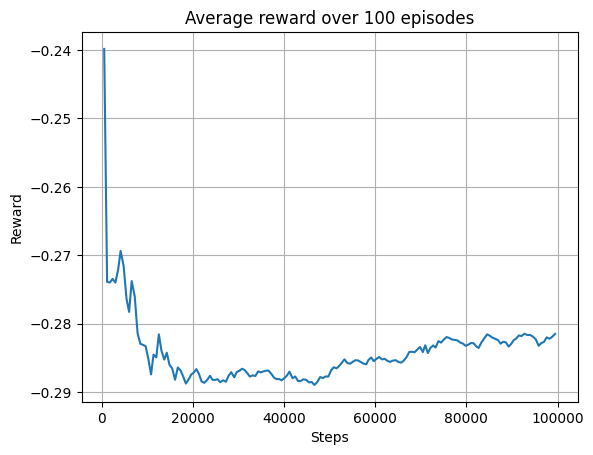

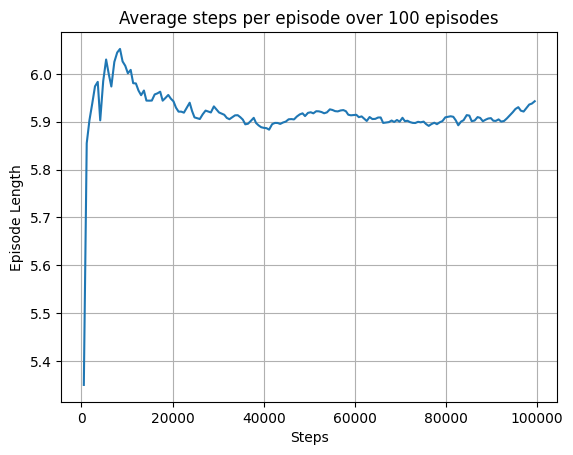

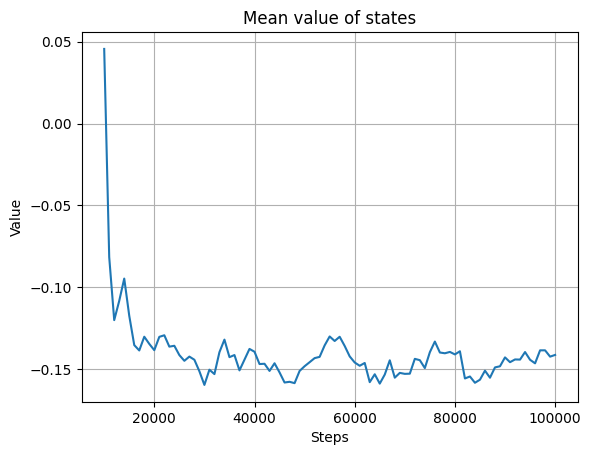

In [21]:
from tensorboard.backend.event_processing import event_accumulator
import pandas as pd
import matplotlib.pyplot as plt

def extract_all_scalars(logfile):
    ea = event_accumulator.EventAccumulator(logfile, size_guidance={event_accumulator.SCALARS: 0})
    ea.Reload()
    tags = ea.Tags()['scalars']
    all_data = {}
    for tag in tags:
        scalars = ea.Scalars(tag)
        data = pd.DataFrame(scalars)
        all_data[tag] = data
    return tags, all_data

# To plot the run insert the full path from /content/runs/
logfile = "/content/runs/My_Data" #CHANGE NAME HERE

# Extract all scalar data and tags
available_tags, all_scalar_data = extract_all_scalars(logfile)
#You can use other tags for extra graphs to check your model performance in more detail

# Function to plot specific tags
def plot_tag_data(tag_data, xlabel, ylabel, title):
    plt.figure()
    plt.plot(tag_data['step'], tag_data['value'])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.show()

# Plotting reward_100, steps_100, and values_mean
plot_tags = {
    'reward_100': ('Steps', 'Reward', 'Average reward over 100 episodes'),
    'steps_100': ('Steps', 'Episode Length', 'Average steps per episode over 100 episodes'),
    'values_mean': ('Steps', 'Value', 'Mean value of states'),
}

for tag, (xlabel, ylabel, title) in plot_tags.items():
    if tag in all_scalar_data:
        plot_tag_data(all_scalar_data[tag], xlabel, ylabel, title)


## Step 7: Evaluating the model

Finally, we will evaluate the trained model on a validation dataset to assess its generalization to new data. Performance metrics, such as total reward, profit, and loss, are used to determine the model's effectiveness in making trading decisions. This process ensures that the `StocksEnv` environment and the `DQNConv1D` model work cohesively to train an RL agent capable of profitable stock trading.

In [ ]:
import os
import matplotlib.pyplot as plt
import torch
import numpy as np
from lib import data

EPSILON = 0.02

def find_best_model(saves_path):
    model_files = [f for f in os.listdir(saves_path) if f.startswith("mean_val-") and f.endswith(".data")]
    print(model_files)
    def extract_value(f):
        try:
            return float(f.split('mean_val-')[1].split('.data')[0])
        except ValueError:
            return float('-inf')  # Return negative infinity if conversion fails
    best_model_file = max(model_files, key=extract_value)
    return os.path.join(saves_path, best_model_file)

def run_model(data_file, model_file, bars, name, commission=0.1, use_conv=False):
    prices = data.load_relative(data_file)
    env = StocksEnv({"TEST": prices}, bars_count=bars, reset_on_close=False, commission=commission,
                    state_1d=use_conv, random_ofs_on_reset=False, reward_on_close=False, volumes=False)
    if use_conv:
        net = DQNConv1D(env.observation_space.shape, env.action_space.n).to(device)
    else:
        net = models.SimpleFFDQN(env.observation_space.shape[0], env.action_space.n).to(device)

    net.load_state_dict(torch.load(model_file, map_location=device))

    obs,_ = env.reset()
    start_price = env._state._cur_close()

    total_reward = 0.0
    step_idx = 0
    rewards = []

    while True:
        step_idx += 1

        # Ensure obs is a numpy array
        if not isinstance(obs, np.ndarray):
            obs = np.array(obs)

        # Convert obs to a tensor
        obs_v = torch.tensor(obs, dtype=torch.float32).unsqueeze(0).to(device)  # Use unsqueeze(0) to add batch dimension
        out_v = net(obs_v)
        action_idx = out_v.max(dim=1)[1].item()
        if np.random.random() < EPSILON:
            action_idx = env.action_space.sample()
        action = Actions(action_idx)

        obs, reward, terminated, truncated, info = env.step(action_idx)
        total_reward += reward
        rewards.append(total_reward)
        if step_idx % 100 == 0:
            print("%d: reward=%.3f" % (step_idx, total_reward))
        if terminated or truncated:
            break

    plt.clf()
    plt.plot(rewards)
    plt.title(f"Total reward, data={name}")
    plt.ylabel("Reward, %")
    plt.savefig(f"rewards-{name}.png")

# Automatically choose the best model file
saves_path = os.path.join("model", args_run)
best_model_file = find_best_model(saves_path)
print(f"Using best model file: {best_model_file}")

# Run the model using the best DQNConv1D model
run_model(data_file="CLAI/data/YNDX_160101_161231.csv",
          model_file=best_model_file,
          bars=50,
          name="test_run",
          commission=0.1,
          use_conv=True)


## Step 8: Guidance Questions

You may find answering the following questions helpful for your report. It is not mandatory, but can help you test yourself.

1. **Environment Setup:**
   - How does the `StocksEnv` class initialize the environment? What parameters does the constructor take, and how do they influence the environment's behavior?
   - How does the environment handle the transition between different states? What mechanisms are in place to ensure the environment adheres to the Gym API specifications?

2. **Observation Space:**
   - What information does the agent observe at each time step? How are the open, high, low, and close prices represented, and why is this representation chosen?
   - How does the inclusion or exclusion of volume data affect the agent’s ability to learn and make decisions?

3. **Action Space and Rewards:**
   - What actions can the agent take in the `StocksEnv` environment? How are these actions represented and processed?
   - How is the reward system designed in this environment? What are the implications of using `reward_on_close` versus incremental rewards for each step?
   - How does the agent's action space (buy, sell, hold) affect its learning process and decision-making? What challenges arise from this action space?

4. **State Representation:**
   - How does the `State` class encode the current environment state for the agent? What role do past bars (time steps) play in this representation?
   - Discuss the importance of the 1D convolutional state representation in the context of sequential data such as stock prices.

5. **Training and Validation:**
   - What challenges did you encounter while training the network? How did you address issues related to overfitting or underfitting?
   - Train the network on data from one of the years and then validate it on both years. Plot the results for both 2015 and 2016. What do you observe? Explain the results.
   - Plot the results for 0% and 0.1% commission. Is your algorithm still profitable? Explain what happens and how commission impacts the agent's strategy.

6. **General Understanding:**
   - Why is it important to have a flexible and customizable environment for training reinforcement learning agents in stock trading?
   - How do the concepts learned from this simulation environment apply to real-world financial markets?
   - Reflect on the limitations of this simplified stock trading simulation. What additional factors or complexities would need to be considered in a real-world scenario?

# Part 2: Stock Environment Extention



### Task Description

Building on the environment from Part 1, your objective is to create a new stock market environment that includes a pool of money for the agent to manage. In this extended environment, the agent will start with a fixed amount of money, which it can use to buy and sell stocks. The agent should be able to purchase multiple stocks in a single transaction, but only whole numbers of shares—no partial shares are allowed.

### Key Requirements

1. **Initial Capital**: The agent starts with a fixed sum of money.
2. **Whole Number Stock Transactions**: The agent can buy or sell only whole numbers of stocks—partial shares are not allowed. For example, if the agent has \$100 and the stock price is \$10, it should be able to buy up to 10 shares.
3. **Dynamic Stock Purchase**: The agent can buy multiple shares in a single transaction, limited by the available funds and the requirement that transactions involve whole shares only.
4. **Action Space**: You have complete freedom in defining the action space. It can be discrete or continuous, depending on your chosen approach.
5. **Edge Cases**: Handle all possible edge cases, such as:
   - Preventing the agent from selling stocks it doesn’t own.
   - Ensuring that only whole shares can be bought or sold.
   - Properly calculating the remaining funds after a transaction, considering commission fees if applicable.

### Implementation

1. **Environment Design**: Extend the environment from Part 1 to include the pool of money and enforce whole-share transactions. Ensure that the agent’s actions adhere to the Gym API specifications. This environment must accurately track the agent’s holdings, available funds, and any profit or loss incurred.

2. **Agent Modification**: After implementing the new environment, validate it by training an RL agent. You may choose to:
   - Modify the existing agents from Part 1 to accommodate the new environment.
   - Design a new agent from scratch that better suits the extended environment.

3. **Performance Comparison**: Compare the results obtained in the new environment with those from Part 1. Analyze the agent’s performance, considering factors such as total profit, risk management, and strategy effectiveness.

### Report Guidelines

In your final report, include a detailed comparison between the results of the agent trained in Part 1 and the agent trained in this extended environment. Discuss how the introduction of a money pool and the restriction to whole-share transactions impact the agent's decision-making process, its ability to manage resources, and its overall profitability. Consider any challenges encountered during the implementation and how they were addressed.

### Evaluation Criteria

- **Correctness**: The environment must function as intended, adhering to the Gym API specifications.
- **Comprehensive Implementation**: Proper handling of all edge cases and accurate tracking of the agent’s portfolio, available funds, and adherence to whole-share transactions.
- **Performance**: Comparison of agent performance between Part 1 and Part 2, with analysis of the differences.
- **Creativity and Research**: Innovative approaches to action space design, agent architecture, and environment dynamics.

### Datasets for Training and Evaluation

1. **Training Dataset**:
   - Use the provided stock price data from `"CLAI/data/YNDX_150101_151231.csv"` to develop and train your RL agent. This dataset contains historical stock price data for the year 2015.

2. **Validation Dataset**:
   - The validation dataset `"CLAI/data/YNDX_160101_161231.csv"` is strictly for evaluating the performance of your trained model. It contains stock price data for the year 2016 and must not be used in the training process. This dataset should only be used to assess how well your model generalizes to unseen data.

### Commission

As in Part 1, you should evaluate your agent's performance under different commission rates. Specifically:
- Provide results for a **0% commission** and a **0.1% commission**.
- You may also explore higher commission rates if desired. This analysis will help you understand how transaction costs affect the agent's trading strategy and profitability.


#Solution

### First Approach

In this approach, we defined **7 discrete actions**, each representing a percentage of the total stocks we could potentially buy. The rationale behind this was to introduce a sense of adaptability in decision-making without creating an infinite action space. Although we experimented with various methods where the action space was continuous (infinite), we were unable to fully test these approaches and, as a result, did not submit them. You can refer to the PDF for more details, but in essence, this method strikes a balance between flexibility and computational feasibility.

In [186]:
import enum
import math
import numpy as np

DEFAULT_BARS_COUNT = 10
DEFAULT_COMMISSION_PERC = 0.1
EPSILON = 0.1  # Small value to avoid division by zero

class Actions(enum.Enum):
    Skip = 0
    Buy_third = 1
    Buy_two_thirds = 2
    Buy_all = 3

    Close_third = 4  # Add Close action
    Close_two_thirds = 5
    Close_all = 6

class StatewithCapital:
    def __init__(self, bars_count, commission_perc, reset_on_close, reward_on_close=False, volumes=True, _initial_capital=10000000):
        assert isinstance(bars_count, int)
        assert bars_count > 0
        assert isinstance(commission_perc, float)
        assert commission_perc >= 0.0
        assert isinstance(reset_on_close, bool)
        assert isinstance(reward_on_close, bool)

        self.bars_count = bars_count
        self.commission_perc = commission_perc
        self.reset_on_close = reset_on_close
        self.reward_on_close = reward_on_close
        self.volumes = volumes
        self._initial_capital = _initial_capital
        self._cash = _initial_capital
        self._shares_held = 0
        self.open_price = 0
        self.rel_profit = 0

    def reset(self, prices, offset):
        assert isinstance(prices, Prices)
        assert offset >= self.bars_count - 1

        self.open_price = 0.0
        self._prices = prices
        self._offset = offset
        self._cash = self._initial_capital
        self._shares_held = 0

    @property
    def shape(self):
        # [h, l, c] * bars + position_flag + rel_profit (since open)
        if self.volumes:
            return (4 * self.bars_count + 1 + 1 + 1, )  # added self.cash
        else:
            return (3 * self.bars_count + 1 + 1 + 1, )  # added self.cash

    def encode(self):
        res = np.zeros(shape=self.shape[0], dtype=np.float32)

        if self.volumes:
            highs_ind = np.array([4 * i for i in range(self.bars_count)])
        else:
            highs_ind = np.array([3 * i for i in range(self.bars_count)])

        lows_ind = highs_ind + 1
        closes_ind = highs_ind + 2

        res[highs_ind] = self._prices.high[self._offset - self.bars_count + 1: self._offset + 1]
        res[lows_ind] = self._prices.low[self._offset - self.bars_count + 1: self._offset + 1]
        res[closes_ind] = self._prices.close[self._offset - self.bars_count + 1: self._offset + 1]

        last_ind = closes_ind[-1]

        if self.volumes:
            res[closes_ind + 1] = self._prices.volume[self._offset - self.bars_count + 1: self._offset + 1]
            last_ind += 1

        res[last_ind + 1] = self._shares_held
        res[last_ind + 2] = self.rel_profit
        res[last_ind + 3] = self._cash

        return res

    def _cur_close(self):
        """
        Return the actual close price for the current bar
        """
        return self._prices.close[self._offset]

    def step(self, action):
        """
        Perform one step in our price, adjust offset, check for the end of prices
        and handle position change
        :param action:
        :return: reward, done
        """
        assert isinstance(action, Actions)
        current_price = self._cur_close()  # Get the actual close price

        reward = 0.0
        done = False

        # Buy action (only whole shares can be bought)
        if (action == Actions.Buy_all or action == Actions.Buy_third or action == Actions.Buy_two_thirds) and self._cash >= current_price:
            self.open_price = current_price
            num_shares_to_buy = min(int(self._cash // max(current_price, EPSILON)), 5000)  # Limit to 5000 shares per transaction

            if action == Actions.Buy_third:
                num_shares_to_buy = math.floor(num_shares_to_buy // 3)
            elif action == Actions.Buy_two_thirds:
                num_shares_to_buy = math.floor(num_shares_to_buy // 2)
            elif action == Actions.Buy_all:
                num_shares_to_buy = math.floor(num_shares_to_buy)

            if num_shares_to_buy > 0:
                self._cash -= num_shares_to_buy * current_price
                self._shares_held += num_shares_to_buy
                self.rel_profit = (current_price - self.open_price) / self.open_price
                reward -= self.commission_perc  # Assuming commission applies for each buy
                reward += 10 * num_shares_to_buy * self.rel_profit  # Reward is based on profit
            #print(f'reward for buying: {reward}, rel_profit: {self.rel_profit}, current price: {current_price}, open price: {self.open_price}')

        # Sell action (only sell what we own)
        elif (action == Actions.Close_all or action == Actions.Close_two_thirds or action == Actions.Close_third) and self._shares_held > 0:
            shares_sold = 0
            adjusted_open_price = max(self.open_price, EPSILON)  # Avoid division by zero

            if action == Actions.Close_all:
                self._cash += self._shares_held * current_price
                shares_sold = self._shares_held
                self._shares_held = 0

            elif action == Actions.Close_two_thirds:
                shares_sold = self._shares_held * 2 // 3
                self._cash += shares_sold * current_price
                self._shares_held -= shares_sold

            elif action == Actions.Close_third:
                shares_sold = self._shares_held // 3
                self._cash += shares_sold * current_price
                self._shares_held -= shares_sold

            reward += 10 * shares_sold * ((current_price - adjusted_open_price) / adjusted_open_price)
            reward -= self.commission_perc  # Apply commission
            if self._shares_held == 0:
                self.rel_profit = 0  # Reset rel_profit if no shares are held

        elif action == Actions.Skip:
            reward -= 0.1 * self.commission_perc  # Small penalty for skipping with shares held

        else:
            reward -= 3 * self.commission_perc  # Penalty for invalid actions

        # Increment the offset (time step)
        self._offset += 1
        done = self._offset >= self._prices.close.shape[0] - 1

        # Clip the reward to ensure it remains within bounds
        #reward = np.clip(reward, -1000, 1000)

        return reward, done


In [187]:

class State1DwithCapital(StatewithCapital):
    """
    State with shape suitable for 1D convolution
    """
    @property
    def shape(self):
        if self.volumes:
            return (7, )
        else:
            return (6, )

    def encode(self):
        res = np.zeros(shape=self.shape[0], dtype=np.float32)
        ofs = self.bars_count-1
        res[0] = self._prices.high[self._offset-ofs:self._offset+1]
        res[1] = self._prices.low[self._offset-ofs:self._offset+1]
        res[2] = self._prices.close[self._offset-ofs:self._offset+1]
        if self.volumes:
            res[3] = self._prices.volume[self._offset-ofs:self._offset+1]
            dst = 4
        else:
            dst = 3

        res[dst] = self._shares_held
        if self.open_price == 0:
            #self.open_price = self._cur_close()
            self.open_price = 0.1
        res[dst+1] = (self._cur_close() - self.open_price) / self.open_price
        res[dst+2] = self._cash
        #res = res.reshape((33, self.bars_count))  # Assuming 33 channels and bars_count as width

    # If you need to add a batch dimension, do it outside this function, or here:
    # res = np.expand_dims(res, axis=0)  # (batch_size, channels, width)

        #return torch.tensor(res, dtype=torch.float32)
        return res

In [188]:
import gym
import numpy as np
import enum
import pandas as pd

# Load CSV file
csv_file_path = '/content/CLAI/data/YNDX_150101_151231.csv'  # Adjust the path as needed
data = pd.read_csv(csv_file_path)
print(data.columns)
# Convert the CSV data into a format usable by your custom environment
class Prices:
    def __init__(self, df):
        self.high = df['<HIGH>'].values
        self.low = df['<LOW>'].values
        self.close = df['<CLOSE>'].values
        self.open = df['<OPEN>'].values
        self.volume = df['<VOL>'].values

prices_data = Prices(data)
prices_dict = {'YNDX': prices_data}  # Store in a dict for the environment
DEFAULT_BARS_COUNT = 10
DEFAULT_COMMISSION_PERC = 0.1
EPSILON = 1e-6  # Small value to avoid division by zero

class Actions(enum.Enum):
    Skip = 0
    Buy_third = 1
    Buy_two_thirds = 2
    Buy_all = 3
    Close_third = 4
    Close_two_thirds = 5
    Close_all = 6

class StocksEnvWithCapital(gym.Env):
    metadata = {'render.modes': ['human']}

    def __init__(self, prices, initial_capital=10000, bars_count=DEFAULT_BARS_COUNT,
                 commission=DEFAULT_COMMISSION_PERC, reset_on_close=True, state_1d=False,
                 random_ofs_on_reset=True, reward_on_close=False, volumes=False):
        super(StocksEnvWithCapital, self).__init__()
        assert isinstance(prices, dict), "Prices must be passed as a dictionary"

        # Ensure all values in the dictionary are of type Prices
        for key, value in prices.items():
            assert isinstance(value, Prices), f"Value for {key} must be a Prices instance"

        print(prices)
        super(StocksEnvWithCapital, self).__init__()  # Make sure to call the parent class constructor
        assert isinstance(prices, dict)
        self._prices = prices

        self._initial_capital = initial_capital
        self._cash = initial_capital
        self._shares_held = 0

        if state_1d:
            self._state = State1DwithCapital(bars_count, commission, reset_on_close, reward_on_close, volumes, initial_capital)
        else:
            self._state = StatewithCapital(bars_count, commission, reset_on_close, reward_on_close, volumes, initial_capital)

        # Define action and observation space
        self.action_space = gym.spaces.Discrete(len(Actions))  # Discrete actions
        self.observation_space = gym.spaces.Box(low=-np.inf, high=np.inf, shape=self._state.shape, dtype=np.float32)
        self.random_ofs_on_reset = random_ofs_on_reset
        self.seed()

    def reset(self):
        self._instrument = np.random.choice(list(self._prices.keys()))  # Select an instrument
        prices = self._prices[self._instrument]
        bars = self._state.bars_count
        self._cash = self._initial_capital
        self._shares_held = 0

        data_length = prices.high.shape[0]
        if data_length < bars * 10:
            raise ValueError(f"Not enough data to reset the environment. Data length: {data_length}, Bars count: {bars}")

        if self.random_ofs_on_reset:
            offset = np.random.choice(data_length - bars * 10) + bars
        else:
            offset = bars

        self._state.reset(prices, offset)
        encoded_state = self._state.encode()
        return encoded_state

    def step(self, action_idx):
        action = Actions(action_idx)
        #print(action)
        reward, done = self._state.step(action)
        obs = self._state.encode()
        info = {"instrument": self._instrument, "offset": self._state._offset}

        #terminated = done
        #truncated = False

        #return obs, reward, terminated, truncated, info
        return obs, reward, done, info

    def render(self, mode='human', close=False):
        print(f"Cash: {self._cash}, Shares held: {self._shares_held}")

    def close(self):
        pass

    def seed(self, seed=None):
        if seed is not None:
            np.random.seed(seed)
            self.np_random = np.random.RandomState(seed)
        else:
            self.np_random = np.random.RandomState()

        seed1 = seed if seed is not None else self.np_random.randint(0, 2**31 - 1)
        seed2 = self.np_random.randint(0, 2**31 - 1)

        return [seed1, seed2]


Index(['<DATE>', '<TIME>', '<OPEN>', '<HIGH>', '<LOW>', '<CLOSE>', '<VOL>'], dtype='object')


In [ ]:
pip install stable-baselines3 gym torch numpy pandas


In [190]:
env = StocksEnvWithCapital(prices_dict, initial_capital=1000000, bars_count=10)


{'YNDX': <__main__.Prices object at 0x7b7f98b35000>}


To ensure a thorough evaluation of our approach, we implemented a custom testing mechanism by designing a callback class called AverageRewardCallback, which monitors and logs the performance of our model over time. Below is a detailed explanation of how we tested our model, focusing on measuring its learning progress and reward behavior.

#Testing Process
We incorporated the AverageRewardCallback class to compute the model's average reward over regular intervals (every 100 steps in this case). This allows us to assess how well the agent is adapting and improving its decision-making as training progresses. Here’s a breakdown of how the testing was conducted:

##Reward Accumulation:

During each step of training, the callback tracks the rewards the agent receives from the environment.
We accumulate these rewards and monitor the number of steps taken.
Regular Logging:

Every 100 steps, the accumulated reward is averaged over that interval and stored for future analysis.
This average reward is printed, giving us real-time feedback on the agent's performance. For instance, the callback logs messages such as:
"Average reward for steps 900 to 1000: X", where X represents the reward value.
Reward Reset:

After each interval, the total reward counter is reset to ensure we capture the performance in the next segment of steps independently.
Visual Analysis:

Once training is complete (after 100,000 steps in this case), we plot a graph of the average rewards over time. The x-axis represents intervals of 100 steps, while the y-axis displays the corresponding average reward. This visual representation helps identify trends, improvements, or plateaus in the model’s performance.
Training Configuration
We used the Deep Q-Network (DQN) algorithm for this experiment, implementing the MlpPolicy to define our agent’s policy. The model was trained in the following configuration:

**Learning rate**: 0.00001 – a low learning rate was chosen to ensure steady and careful learning.

**Gamma**: 0.99 – this high discount factor ensures the agent focuses on long-term rewards.

**Total training timesteps**: 100,000 – allowing the agent sufficient time to explore and learn from the environment.
##Post-Training Evaluation
Once the training completed, the stored average rewards were plotted using Matplotlib. This graph offered a clear visualization of how the model’s performance evolved, revealing whether the learning algorithm was effectively adapting its strategy to maximize rewards over time.

Through this elegant combination of quantitative tracking and visual analysis, we were able to gain deep insights into our model’s behavior and improvement trajectory throughout training.

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning:

You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.



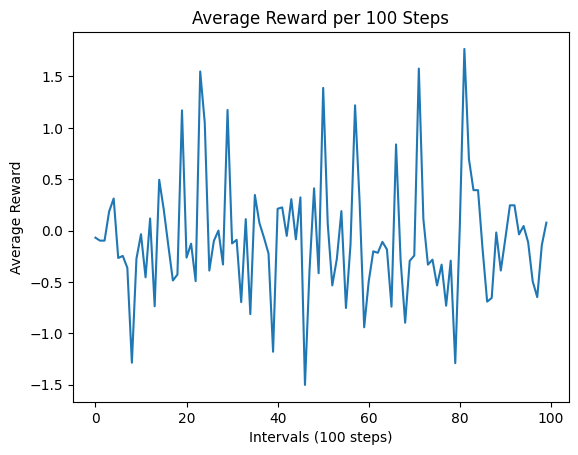

In [191]:
import matplotlib.pyplot as plt
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3 import DQN
class AverageRewardCallback(BaseCallback):
    def __init__(self, check_freq: int, verbose=0):
        super(AverageRewardCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.total_rewards = 0
        self.step_count = 0
        self.average_rewards = []  # List to store average rewards for plotting

    def _on_step(self) -> bool:
        # Accumulate rewards and steps
        reward = self.locals['rewards'][0]  # Access reward from the environment
        self.total_rewards += reward
        self.step_count += 1

        # Every 'check_freq' steps, calculate and store the average reward
        if self.step_count % self.check_freq == 0:
            average_reward = self.total_rewards / self.check_freq
            self.average_rewards.append(average_reward)  # Store for plotting
            #print(f"Average reward for steps {self.step_count - self.check_freq} to {self.step_count}: {average_reward}")
            self.total_rewards = 0  # Reset for the next 1000 steps

        return True

    def plot_rewards(self):
        # Plot average rewards over 1000-step intervals
        plt.plot(range(len(self.average_rewards)), self.average_rewards)
        plt.xlabel('Intervals (100 steps)')
        plt.ylabel('Average Reward')
        plt.title('Average Reward per 100 Steps')
        plt.show()

# Create the callback
check_freq = 100  # Log average reward every 1000 steps
callback = AverageRewardCallback(check_freq=check_freq)

# Train the model for 100000 steps
model = DQN('MlpPolicy', env, verbose=1, learning_rate=0.00001 , gamma=0.99)
model.learn(total_timesteps=10000, callback=callback)

# After training, plot the rewards
callback.plot_rewards()


###Approach 2
In this approach, we decided to maintain the same action space as in part 1, where the agent either sells all its holdings or buys as much as it can. We found this approach to be much simpler to implement, and it resolved a key issue we encountered in the previous method related to calculating relative profit. As explained in the accompanying essay, the problem no longer exists because the agent is restricted from performing consecutive sell or buy actions back-to-back. This ensures a more structured trading process and prevents erratic behavior, resulting in a more consistent and interpretable strategy.

In [178]:
DEFAULT_BARS_COUNT = 10
DEFAULT_COMMISSION_PERC = 0.1
EPSILON = 0.1  # Small value to avoid division by zero
import enum

DEFAULT_BARS_COUNT = 10
DEFAULT_COMMISSION_PERC = 0.1

class Actions(enum.Enum):
    Skip = 0
    Buy = 1
    Close = 2
class StatewithCapital:
    def __init__(self, bars_count, commission_perc, reset_on_close, reward_on_close=False, volumes=True, _initial_capital=10000):
        assert isinstance(bars_count, int)
        assert bars_count > 0
        assert isinstance(commission_perc, float)
        assert commission_perc >= 0.0
        assert isinstance(reset_on_close, bool)
        assert isinstance(reward_on_close, bool)
        self.bars_count = bars_count
        self.commission_perc = commission_perc
        self.reset_on_close = reset_on_close
        self.reward_on_close = reward_on_close
        self.volumes = volumes
        self._initial_capital = _initial_capital
        self._cash = _initial_capital
        self._shares_held = 0
        self.rel_profit = 0
        self.open_price = 0.0

    def reset(self, prices, offset):
        assert isinstance(prices, Prices)
        assert offset >= self.bars_count - 1
        self.open_price = 0.0
        self._prices = prices
        self._offset = offset
        self._cash = self._initial_capital
        self._shares_held = 0

    @property
    def shape(self):
        # [h, l, c] * bars + position_flag + rel_profit (since open)
        if self.volumes:
            return (4 * self.bars_count + 1 + 1 + 1,)  # Added self.cash
        else:
            return (3 * self.bars_count + 1 + 1 + 1,)  # Added self.cash

    def encode(self):
        res = np.zeros(shape=self.shape, dtype=np.float32)

        if self.volumes:
            highs_ind = np.array([4 * i for i in range(self.bars_count)])
        else:
            highs_ind = np.array([3 * i for i in range(self.bars_count)])
        lows_ind = highs_ind + 1
        closes_ind = highs_ind + 2

        res[highs_ind] = self._prices.high[self._offset - self.bars_count + 1:self._offset + 1]
        res[lows_ind] = self._prices.low[self._offset - self.bars_count + 1:self._offset + 1]
        res[closes_ind] = self._prices.close[self._offset - self.bars_count + 1:self._offset + 1]
        last_ind = closes_ind[-1]

        if self.volumes:
            res[closes_ind + 1] = self._prices.volume[self._offset - self.bars_count + 1:self._offset + 1]
            last_ind += 1

        res[last_ind + 1] = self._shares_held
        res[last_ind + 2] = self.rel_profit
        res[last_ind + 3] = self._cash
        return res

    def _cur_close(self):
        """
        Calculate real close price for the current bar
        """
        return self._prices.close[self._offset]

    def step(self, action):
        """
        Perform one step in our price, adjust offset, check for the end of prices
        and handle position change
        :param action:
        :return: reward, done
        """
        assert isinstance(action, Actions)
        current_price = self._cur_close()

        reward = 0.0
        done = False

        # Buy action (only whole shares can be bought)
        if action == Actions.Buy and self._cash >= current_price:
            self.open_price = current_price
            num_shares_to_buy = min(int(self._cash // max(current_price, EPSILON)), 5000)  # Limit to 5000 shares
            #print(f' {int(self._cash // max(current_price, EPSILON))}')
            #print(f'why ? {self._cash//current_price} {self._cash}')

            if num_shares_to_buy > 0:
                self._cash -= num_shares_to_buy * current_price
                #print(self._cash)
                self._shares_held += num_shares_to_buy
                reward -= self.commission_perc  # Apply commission
                #print(f"Buying {num_shares_to_buy} shares at price {current_price}")
            else:
                reward -= 1  # Penalty for attempting to buy without sufficient funds

        # Sell action (only sell what we own)
        elif action == Actions.Close and self._shares_held > 0:
            adjusted_open_price = max(self.open_price, EPSILON)  # Avoid division by zero
            self.rel_profit = (current_price - adjusted_open_price) / adjusted_open_price
            self._cash += self._shares_held * current_price
            reward += 100* self._shares_held * self.rel_profit  # Reward based on actual profit per share
            self._shares_held = 0
            reward -= self.commission_perc  # Apply commission
            #print(f"Sold shares with relative profit {self.rel_profit:.4f} at price {current_price}")


        elif action == Actions.Skip and self._shares_held > 0:
            reward -= 0.1 * self.commission_perc  # Small penalty for skipping while holding shares
        else:
            reward -= 1  # Penalty for unnecessary skip or invalid action


        self._offset += 1
        done = self._offset >= self._prices.close.shape[0] - 1


        portfolio_value = self._cash + self._shares_held * current_price
        self._cash = portfolio_value - self.commission_perc  # Account for commission fees
        adjusted_initial_capital = max(self._initial_capital, EPSILON)
        reward += np.clip((portfolio_value - self._initial_capital) / adjusted_initial_capital, -1, 1)



        return reward, done


**State 1D**

In [179]:
#DONT USE NOW
class State1DwithCapital(StatewithCapital):
    """
    State with shape suitable for 1D convolution
    """
    @property
    def shape(self):
        if self.volumes:
            return (7, self.bars_count)
        else:
            return (6, self.bars_count)

    def encode(self):
        res = np.zeros(shape=self.shape, dtype=np.float32)
        ofs = self.bars_count-1
        res[0] = self._prices.high[self._offset-ofs:self._offset+1]
        res[1] = self._prices.low[self._offset-ofs:self._offset+1]
        res[2] = self._prices.close[self._offset-ofs:self._offset+1]
        if self.volumes:
            res[3] = self._prices.volume[self._offset-ofs:self._offset+1]
            dst = 4
        else:
            dst = 3

        res[dst] = self._shares_held
        if self.open_price == 0:
            #self.open_price = self._cur_close()
            self.open_price = 0.1
        res[dst+1] = (self._cur_close() - self.open_price) / self.open_price
        res[dst+2] = self._cash
        return res

**Stocks ENV**

In [180]:
#The one with 3 actions
import gym
import numpy as np
import enum
import pandas as pd

# Load CSV file
csv_file_path = '/content/CLAI/data/YNDX_150101_151231.csv'  # Adjust the path as needed
data = pd.read_csv(csv_file_path)
print(data.columns)
# Convert the CSV data into a format usable by your custom environment
class Prices:
    def __init__(self, df):
        self.high = df['<HIGH>'].values
        self.low = df['<LOW>'].values
        self.close = df['<CLOSE>'].values
        self.open = df['<OPEN>'].values
        self.volume = df['<VOL>'].values

prices_data = Prices(data)
prices_dict = {'YNDX': prices_data}  # Store in a dict for the environment

DEFAULT_BARS_COUNT = 10
DEFAULT_COMMISSION_PERC = 0.1
EPSILON = 1e-6  # Small value to avoid division by zero

class Actions(enum.Enum):
    Skip = 0
    Buy = 1
    Close = 2  # Add Close action

class StocksEnvWithCapital(gym.Env):
    metadata = {'render.modes': ['human']}

    def __init__(self, prices, initial_capital=10000, bars_count=DEFAULT_BARS_COUNT,
                 commission=DEFAULT_COMMISSION_PERC, reset_on_close=True, state_1d=False,
                 random_ofs_on_reset=True, reward_on_close=False, volumes=False):
        assert isinstance(prices, dict)
        self._prices = prices

        self._initial_capital = initial_capital
        self._cash = initial_capital
        self._shares_held = 0
        #self._total_value = initial_capital

        if state_1d:
            self._state = State1DwithCapital(bars_count, commission, reset_on_close, reward_on_close, volumes,initial_capital)
        else:
            self._state = StatewithCapital(bars_count, commission, reset_on_close, reward_on_close, volumes,initial_capital)

        self.action_space = gym.spaces.Discrete(len(Actions))  # Buy, Sell, Skip
        self.observation_space = gym.spaces.Box(low=-np.inf, high=np.inf, shape=self._state.shape, dtype=np.float32)
        self.random_ofs_on_reset = random_ofs_on_reset
        self.seed()

    def reset(self):
        self._instrument = self.np_random.choice(list(self._prices.keys()))  # Select an instrument
        prices = self._prices[self._instrument]
        bars = self._state.bars_count
        self._cash = self._initial_capital
        self._shares_held = 0
        #self._total_value = self._initial_capital

        # Access prices using attribute access (dot notation) instead of dictionary access
        data_length = prices.high.shape[0]  # Access the 'high' field as an attribute

        if data_length < bars * 10:
            raise ValueError(f"Not enough data to reset the environment. Data length: {data_length}, Bars count: {bars}")

        if self.random_ofs_on_reset:
            offset = self.np_random.choice(data_length - bars * 10) + bars
        else:
            offset = bars

        self._state.reset(prices, offset)
        encoded_state = self._state.encode()
        return encoded_state


    def step(self, action_idx): # ITAI: what did you do here?
        action = Actions(action_idx)
        reward, done = self._state.step(action)
        obs = self._state.encode()
        info = {"instrument": self._instrument, "offset": self._state._offset}

        # Assume done was previously a single boolean indicating the end of an episode for any reason.
        # We need to separate this into 'terminated' (natural end) and 'truncated' (premature end).



        return obs, reward, done, info

    def render(self, mode='human', close=False):
        print(f"Cash: {self._cash}, Shares held: {self._shares_held}, Total Value: {self._total_value}")

    def close(self):
        pass

    def seed(self, seed=None):
        if seed is not None:
            np.random.seed(seed)
            self.np_random = np.random.RandomState(seed)
        else:
            self.np_random = np.random.RandomState()

        seed1 = seed if seed is not None else self.np_random.randint(0, 2**31 - 1)
        seed2 = self.np_random.randint(0, 2**31 - 1)

        return [seed1, seed2]

    @classmethod
    def from_dir(cls, data_dir, **kwargs):
        prices = {file: data.load_relative(file) for file in data.price_files(data_dir)}
        return StocksEnvWithCapital(prices, **kwargs)


Index(['<DATE>', '<TIME>', '<OPEN>', '<HIGH>', '<LOW>', '<CLOSE>', '<VOL>'], dtype='object')


In [ ]:
pip install stable-baselines3 gym torch numpy pandas


In [182]:
env = StocksEnvWithCapital(prices_dict, initial_capital=10000, bars_count=10)


###Testing
For testing, we applied the same method as in Approach 1. By addressing the issue of relative profit, we observed that the mean reward is progressively improving over time, which is exactly the result we aimed for. This suggests that the adjustments to the action space and reward structure have enhanced the agent's ability to learn and make profitable decisions.

In particular, the agent no longer experiences significant reward inconsistencies due to consecutive buy or sell actions, as the restrictions we introduced ensure a more stable reward feedback. As a result, the learning process becomes smoother, and the model demonstrates a clear upward trend in average rewards, indicating improved performance and decision-making.

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


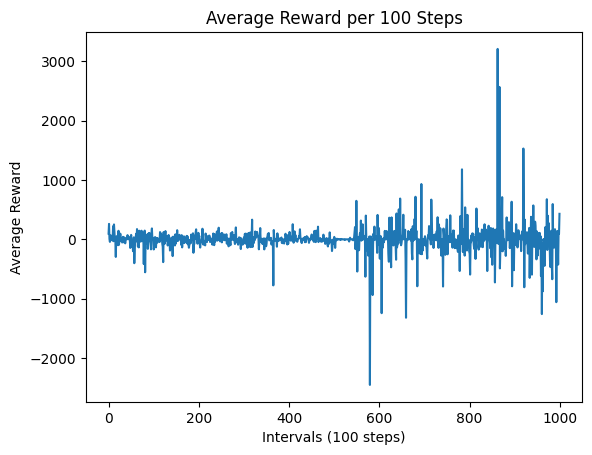

In [184]:
import matplotlib.pyplot as plt
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3 import DQN
class AverageRewardCallback(BaseCallback):
    def __init__(self, check_freq: int, verbose=0):
        super(AverageRewardCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.total_rewards = 0
        self.step_count = 0
        self.average_rewards = []  # List to store average rewards for plotting

    def _on_step(self) -> bool:
        # Accumulate rewards and steps
        reward = self.locals['rewards'][0]  # Access reward from the environment
        self.total_rewards += reward
        self.step_count += 1

        # Every 'check_freq' steps, calculate and store the average reward
        if self.step_count % self.check_freq == 0:
            average_reward = self.total_rewards / self.check_freq
            self.average_rewards.append(average_reward)  # Store for plotting
            #print(f"Average reward for steps {self.step_count - self.check_freq} to {self.step_count}: {average_reward}")
            self.total_rewards = 0  # Reset for the next 1000 steps

        return True

    def plot_rewards(self):
        # Plot average rewards over 1000-step intervals
        plt.plot(range(len(self.average_rewards)), self.average_rewards)
        plt.xlabel('Intervals (100 steps)')
        plt.ylabel('Average Reward')
        plt.title('Average Reward per 100 Steps')
        plt.show()

# Create the callback
check_freq = 100  # Log average reward every 1000 steps
callback = AverageRewardCallback(check_freq=check_freq)

# Train the model for 100000 steps
model = DQN('MlpPolicy', env, verbose=1, learning_rate=0.00001 , gamma=0.99)
model.learn(total_timesteps=100000, callback=callback)

# After training, plot the rewards
callback.plot_rewards()


# Export to PDF

Run the following cell to download the notebook as a nicely formatted pdf file.

In [194]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!wget -nc https://raw.githubusercontent.com/omershubi/colab-pdf/master/colab_pdf.py

from colab_pdf import colab_pdf

# If you saved the notebook in the default location in your Google Drive,
#  and didn't change the name of the file, the code should work as is. If not, adapt accordingly.
# E.g. in your case the file name may be "Copy of XXXX.ipynb"

colab_pdf(file_name='CLAI_236203_FINAL_PROJECT_(2) (4).ipynb', notebookpath="drive/MyDrive/Colab Notebooks")

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pandoc is already the newest version (2.9.2.1-3ubuntu2).
texlive is already the newest version (2021.20220204-1).
texlive-latex-extra is already the newest version (2021.20220204-1).
texlive-xetex is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 51 not upgraded.
File ‘colab_pdf.py’ already there; not retrieving.



W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


[NbConvertApp] Converting notebook drive/MyDrive/Colab Notebooks/CLAI_236203_FINAL_PROJECT_(2) (4).ipynb to pdf
/usr/local/lib/python3.10/dist-packages/nbconvert/filters/datatypefilter.py:41: UserWarning: Your element with mimetype(s) dict_keys(['text/html']) is not able to be represented.
  warn(
[NbConvertApp] Support files will be in CLAI_2362

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'